# 2. Pandas里的数据结构

学习 pandas 的关键是理解它的数据结构。 数据结构是数据值的集合，定义了数据之间的关系，以及可以对数据执行的操作。 pandas中主要有三种数据结构：
* Series
* DataFrame
* Panel

使用最广泛的pandas数据结构是Series和DataFrame。简单地说，Series 类似于单列数据，而DataFrame类似于具有行和列的工作表。 可以类推进行理解，一个Panel相当于多个DataFrame所构成的集合。

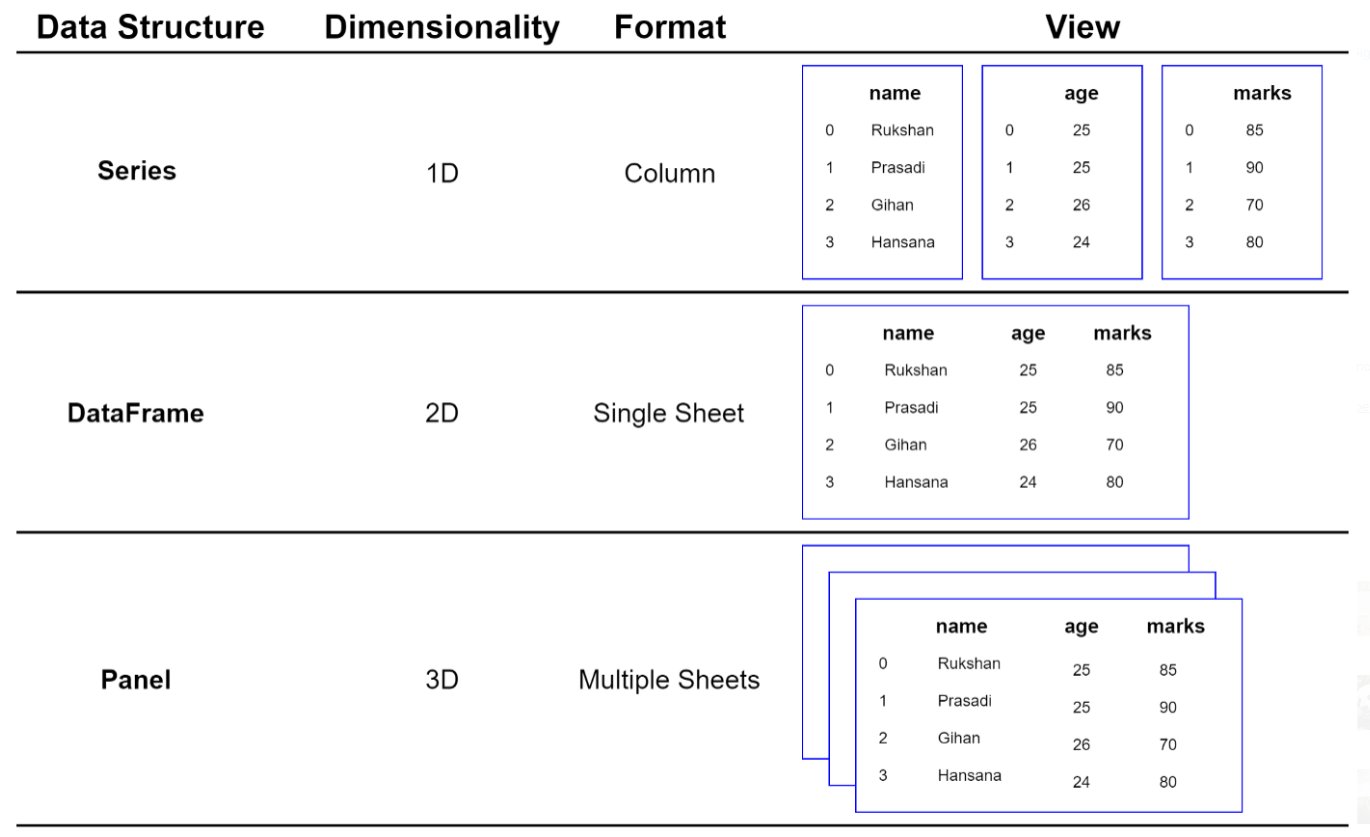

In [2]:
from IPython.display import Image
imag=Image('1.png')
imag

## 2.1 Series

Series是Pandas用来展现一维数据的数据结构，类似于但不完全等于C++/C语言中的数组，Numpy。Series在数组的基础上显式地增加了一些特征。一个Series包含两部分：
* 一维数据（Values）
* 索引（Index）

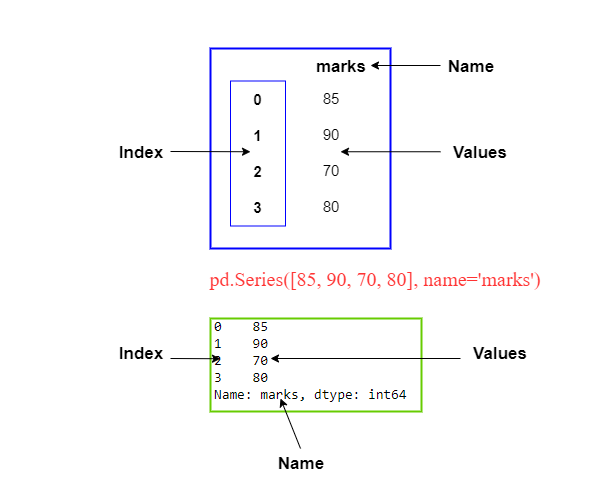

In [3]:
imag=Image('2.png')
imag

要创建系列，您只需调用 Series() 类构造函数,并传递给它List-like数据。 在这里，List-like数据可以是以下之一：
* 一维的ndarray
* Python List类型数据
* Python 字典
* 标量数据

如果未指定索引，则将创建默认索引 [0,… n-1]，其中 n 是数据的长度。 可以从以上所示来源创建。

Series类构造具体方法如下：
<dt class="sig sig-object py" id="pandas.Series">
<em class="property"><span class="pre">class</span><span class="w"> </span></em><span class="sig-prename descclassname"><span class="pre">pandas.</span></span><span class="sig-name descname"><span class="pre"><span class="highlighted">Series</span></span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">data</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">index</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">dtype</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">name</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">copy</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">False</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">fastpath</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">False</span></span></em><span class="sig-paren">)</span><a class="reference external" href="https://github.com/pandas-dev/pandas/blob/v1.4.2/pandas/core/series.py#L201-L5639"><span class="viewcode-link"><span class="pre">[source]</span></span></a><a class="headerlink" href="#pandas.Series" title="Permalink to this definition">¶</a></dt>

<dl class="field-list simple">
<dt class="field-odd">Parameters</dt>
<dd class="field-odd"><dl class="simple">
<dt><strong>data: </strong><span class="classifier">array-like, Iterable, dict, or scalar value</span></dt><dd><p>Contains data stored in <span class="highlighted">Series</span>. If data is a dict, argument order is
maintained.</p>
</dd>
<dt><strong>index: </strong><span class="classifier">array-like or Index (1d)</span></dt><dd><p>Values must be hashable and have the same length as <cite>data</cite>.
Non-unique index values are allowed. Will default to
RangeIndex (0, 1, 2, …, n) if not provided. If data is dict-like
and index is None, then the keys in the data are used as the index. If the
index is not None, the resulting <span class="highlighted">Series</span> is reindexed with the index values.</p>
</dd>
<dt><strong>dtype: </strong><span class="classifier">str, numpy.dtype, or ExtensionDtype, optional</span></dt><dd><p>Data type for the output <span class="highlighted">Series</span>. If not specified, this will be
inferred from <cite>data</cite>.
See the <a class="reference internal" href="../../user_guide/basics.html#basics-dtypes"><span class="std std-ref">user guide</span></a> for more usages.</p>
</dd>
<dt><strong>name: </strong><span class="classifier">str, optional</span></dt><dd><p>The name to give to the <span class="highlighted">Series</span>.</p>
</dd>
<dt><strong>copy: </strong><span class="classifier">bool, default False</span></dt><dd><p>Copy input data. Only affects <span class="highlighted">Series</span> or 1d ndarray input. See examples.</p>
</dd>
</dl>
</dd>
</dl>

请注意(以下叙述来自于Series Document):

Labels need not be unique but must be a hashable type. The object supports both integer- and label-based indexing and provides a host of methods for performing operations involving the index. Statistical methods from ndarray have been overridden to automatically exclude missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their associated index values– they need not be the same length. The result index will be the sorted union of the two indexes.

### 2.1.1 用一维ndarray创建
NumPy 最重要的一个特点是其 N 维数组对象 ndarray，它是一系列同类型数据的集合，以 0 下标为开始进行集合中元素的索引。

In [136]:
import pandas as pd
import numpy as np

In [138]:
np_array=np.arange(0,9,2)
pd_series=pd.Series(np_array,index=[1,2,3,4,5])
pd_series

1    0
2    2
3    4
4    6
5    8
dtype: int32

虽然ndarray可以是多维数据，但是在构造Series时，该数据必须为一维，否则会报错。

### 2.1.2 用Python List创建

In [139]:
my_list=[1,2,3,4,5]
pd_series=pd.Series(my_list)
pd_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 2.1.3 用Python 字典对象创建

In [140]:
my_dict={
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5
}
pd_series=pd.Series(my_dict)
pd_series

1    1
2    2
3    3
4    4
5    5
dtype: int64

### 2.1.4 用标量创建

In [142]:
pd_series=pd.Series(3,index=['1st','2st','3st','4st','5st'])
pd_series

1st    3
2st    3
3st    3
4st    3
5st    3
dtype: int64

### 2.1.5 关于索引

In [144]:
pd_series=pd.Series([1,2,3,4,5],index=[1,2,3,4,5])
pd_series

1    1
2    2
3    3
4    4
5    5
dtype: int64

In [ ]:
pd_series[1]

In [145]:
my_dict={
    '1st':1,
    '2st':2,
    '3st':3,
    '4st':4,
    '5st':5
}
pd_series=pd.Series(my_dict)
pd_series

1st    1
2st    2
3st    3
4st    4
5st    5
dtype: int64

In [148]:
pd_series['1st']

1

In [150]:
pd_series['1st':'4st']

1st    1
2st    2
3st    3
dtype: int64

In [151]:
pd_series=pd.Series([1,2,3,4,5],index=[1,2,4,3,5])

In [152]:
pd_series[0:2]

1    1
2    2
dtype: int64

In [56]:
my_dict={
    '1st':1,
    '2st':2,
    '3st':3,
    '4st':4,
    '5st':5
}
pd_series=pd.Series(my_dict)
pd_series

1st    1
2st    2
3st    3
4st    4
5st    5
dtype: int64

In [57]:
pd_series[0:2]

1st    1
2st    2
dtype: int64

In [58]:
pd_series['1st':'3st']

1st    1
2st    2
3st    3
dtype: int64

非常特殊的示范

In [132]:
pd_series=pd.Series([1,2,3,4,5,6],index=['1st','2st','3st','4st','5st','5st'])
pd_series

1st    1
2st    2
3st    3
4st    4
5st    5
5st    6
dtype: int64

In [133]:
pd_series['1st':'5st']

1st    1
2st    2
3st    3
4st    4
5st    5
5st    6
dtype: int64

总结：

* 如果index为整数，且并不按照[0,1,……,N-1]排布，那么用[整数]索引的是按index索引而不是按位索引；
* 如果index不为整数，那么用[]进行索引时既可以用[整数]来索引，也可以用[object]来索引。用[整数]索引时为按位索引；
* 但对于切片，若index为整数，且并不按照[0,1,……,N-1]排布，切片是按位索引而不是按index索引。
* 对于切片，若index不为整数，那么切片索引既可以用整数来按位索引，也可以用object来索引。用整数索引时按位索引，数据为N-M-1个（不包含最后一位）。但用object索引时，按index索引，数据为N-M个（包含最后一位）,起始和终止位置为object_start最先出现和object_end最后出现位置。

## 2.2 DataFrame
DataFrame 是由行和列组成的二维数据结构——就像一个简单的电子表格或 SQL 表。 DataFrame 的每一列都是一个Series。 这些列的长度相同，但它们可以是不同的数据类型——float、int、bool 等。部分可以用在Series上的方法也可以用在DataFrame上。

一个DataFrame具体由以下三个元素构成：

* 二维数据
* 行索引
* 列索引

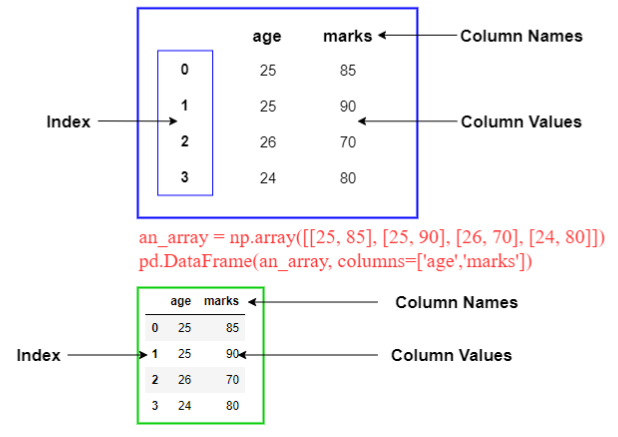

In [81]:
imag=Image('3.png')
imag

要创建DataFrame，与Series相似，可以用以下数据类型来创建：
* 二维ndarray
* 字典的字典
* Lists的字典
* Series的字典



创建DataFrame类具体方法如下：
<dt class="sig sig-object py" id="pandas.DataFrame">
<em class="property"><span class="pre">class</span><span class="w"> </span></em><span class="sig-prename descclassname"><span class="pre">pandas.</span></span><span class="sig-name descname"><span class="pre"><span class="highlighted">DataFrame</span></span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">data</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">index</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">columns</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">dtype</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">copy</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em><span class="sig-paren">)</span><a class="reference external" href="https://github.com/pandas-dev/pandas/blob/v1.4.2/pandas/core/frame.py#L459-L10970"><span class="viewcode-link"><span class="pre">[source]</span></span></a><a class="headerlink" href="#pandas.DataFrame" title="Permalink to this definition">¶</a></dt>

<dl>
<dt><strong>data：</strong><span class="classifier">ndarray (structured or homogeneous), Iterable, dict, or <span class="highlighted">DataFrame</span></span></dt><dd><p>Dict can contain Series, arrays, constants, dataclass or list-like objects. If
data is a dict, column order follows insertion-order. If a dict contains Series
which have an index defined, it is aligned by its index.</p>
<div class="versionchanged">
<p><span class="versionmodified changed">Changed in version 0.25.0: </span>If data is a list of dicts, column order follows insertion-order.</p>
</div>
</dd>
<dt><strong>index： </strong><span class="classifier">Index or array-like</span></dt><dd><p>Index to use for resulting frame. Will default to RangeIndex if
no indexing information part of input data and no index provided.</p>
</dd>
<dt><strong>columns： </strong><span class="classifier">Index or array-like</span></dt><dd><p>Column labels to use for resulting frame when data does not have them,
defaulting to RangeIndex(0, 1, 2, …, n). If data contains column labels,
will perform column selection instead.</p>
</dd>
<dt><strong>dtype： </strong><span class="classifier">dtype, default None</span></dt><dd><p>Data type to force. Only a single dtype is allowed. If None, infer.</p>
</dd>
<dt><strong>copy： </strong><span class="classifier">bool or None, default None</span></dt><dd><p>Copy data from inputs.
For dict data, the default of None behaves like <code class="docutils literal notranslate"><span class="pre">copy=True</span></code>. For <span class="highlighted">DataFrame</span>
or 2d ndarray input, the default of None behaves like <code class="docutils literal notranslate"><span class="pre">copy=False</span></code>.</p>
<div class="versionchanged">
<p><span class="versionmodified changed">Changed in version 1.3.0.</span></p>
</div>
</dd>
</dl>

### 2.2.1 用二维ndarray创建

In [82]:
np_array=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
pd_dataframe=pd.DataFrame(np_array,columns=['a', 'b', 'c'])   
pd_dataframe

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


### 2.2.2 用字典的字典创建

In [84]:
nested_dict = { 'dictA': {'key_1': 'value_1'},
                'dictB': {'key_2': 'value_2'}}
pd_dataframe=pd.DataFrame(nested_dict)
pd_dataframe

,dictA,dictB
key_1,value_1,NaN
key_2,NaN,value_2


### 2.2.3 用list的字典创建

In [85]:
list_dict= {'col1': [1, 2], 'col2': [3, 4]}
pd_dataframe=pd.DataFrame(list_dict)
pd_dataframe

,col1,col2
0,1,3
1,2,4


### 2.2.4 用Series的字典来创建

In [87]:
series_dict = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
pd_dataframe=pd.DataFrame(series_dict,index=[0,1,2,3])
pd_dataframe

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


### 2.2.5 从文件中创建DataFrame*
如”综述"那一节所讲的那样，DataFrame支持读取多种类型的文件(这些文件本身必须为结构化的数据)。这里就不再次赘述。

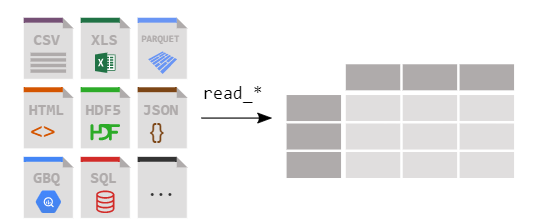

In [89]:
imag=Image('4.png')
imag

### 2.2.6 关于索引
Pandas DataFrame为二维数据，所以索引方式和Series有着一定的差异。不过对于时常操作面板数据的人来说，并不为什么难事。可分为以下索引方式：
* []索引
* loc索引
* iloc索引
* 切片

In [92]:
df=pd.read_csv("input.csv")
df.set_index('State',inplace=True)
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False
OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False


In [94]:
df['Account length']

State
KS    128
OH    107
NJ    137
OH     84
OK     75
     ... 
AZ    192
WV     68
RI     28
CT    184
TN     74
Name: Account length, Length: 3333, dtype: int64

In [102]:
df.loc['KS']

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
KS,70,408,No,No,0,232.1,122.0,39.46,292.3,112.0,24.85,201.2,112.0,9.05,0.0,0,0.00,3.0,False
KS,92,408,Yes,No,0,62.6,111.0,10.64,180.6,126.0,15.35,221.7,80.0,9.98,10.4,2,2.81,1.0,True
KS,137,408,No,No,0,205.9,88.0,35.00,209.3,86.0,17.79,289.9,84.0,13.05,14.5,4,3.92,2.0,False
KS,132,415,No,No,0,83.4,110.0,14.18,232.2,137.0,19.74,146.7,114.0,6.60,7.6,5,2.05,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KS,164,510,No,Yes,30,238.8,100.0,40.60,230.0,121.0,19.55,206.3,66.0,9.28,13.2,8,3.56,1.0,False
KS,101,415,No,No,0,231.3,87.0,39.32,224.7,88.0,19.10,214.6,69.0,9.66,7.2,7,1.94,1.0,False
KS,127,415,No,Yes,24,154.8,69.0,26.32,177.2,105.0,15.06,207.6,102.0,9.34,9.0,4,2.43,1.0,False


In [103]:
df.loc['KS','Account length']

State
KS    128
KS     70
KS     92
KS    137
KS    132
     ... 
KS    164
KS    101
KS    127
KS     57
KS    170
Name: Account length, Length: 70, dtype: int64

In [104]:
df.loc[['KS','OH']]

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
KS,70,408,No,No,0,232.1,122.0,39.46,292.3,112.0,24.85,201.2,112.0,9.05,0.0,0,0.00,3.0,False
KS,92,408,Yes,No,0,62.6,111.0,10.64,180.6,126.0,15.35,221.7,80.0,9.98,10.4,2,2.81,1.0,True
KS,137,408,No,No,0,205.9,88.0,35.00,209.3,86.0,17.79,289.9,84.0,13.05,14.5,4,3.92,2.0,False
KS,132,415,No,No,0,83.4,110.0,14.18,232.2,137.0,19.74,146.7,114.0,6.60,7.6,5,2.05,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OH,160,415,No,No,0,206.3,66.0,35.07,241.1,109.0,20.49,227.8,102.0,10.25,11.7,6,3.16,0.0,False
OH,88,408,No,No,0,274.6,105.0,46.68,161.1,121.0,13.69,194.4,123.0,8.75,9.2,4,2.48,2.0,False
OH,106,415,No,Yes,30,220.1,105.0,37.42,222.2,109.0,18.89,158.4,96.0,7.13,13.1,8,3.54,0.0,False


In [105]:
df.loc[['KS','OH'],['Account length','Area code']]

,Account length,Area code
State,,
KS,128,415
KS,70,408
KS,92,408
KS,137,408
KS,132,415
...,...,...
OH,160,415
OH,88,408
OH,106,415


In [106]:
df.loc[df['Account length']>100,['Area code', 'Churn']]

,Area code,Churn
State,,
KS,415,False
OH,415,False
NJ,415,False
AL,510,False
MA,510,NaN
...,...,...
GA,510,True
IN,415,True
WV,415,False


In [111]:
df.iloc[3]

Account length               84
Area code                   408
International plan          Yes
Voice mail plan              No
Number vmail messages         0
Total day minutes         299.4
Total day calls            71.0
Total day charge           50.9
Total eve minutes          61.9
Total eve calls            88.0
Total eve charge           5.26
Total night minutes       196.9
Total night calls          89.0
Total night charge         8.86
Total intl minutes          6.6
Total intl calls              7
Total intl charge          1.78
Customer service calls      2.0
Churn                     False
Name: OH, dtype: object

In [114]:
df.iloc[3,0]

84

In [115]:
df.iloc[[0,1],[2,3]]

,International plan,Voice mail plan
State,,
KS,No,Yes
OH,No,Yes


In [119]:
df.iloc[list(df['Account length']>100),[0,1]]

,Account length,Area code
State,,
KS,128,415
OH,107,415
NJ,137,415
AL,118,510
MA,121,510
...,...,...
GA,122,510
IN,117,415
WV,159,415


In [127]:
df[['Area code','Churn']][0:5]

,Area code,Churn
State,,
KS,415,False
OH,415,False
NJ,415,False
OH,408,False
OK,415,False


In [128]:
df.iloc[3:6,5:8]

,Total day minutes,Total day calls,Total day charge
State,,,
OH,299.4,71.0,50.90
OK,166.7,113.0,28.34
AL,223.4,98.0,37.98


错误示范：

In [135]:
df.loc['KS':'OH']

KeyError: "Cannot get left slice bound for non-unique label: 'KS'"

总结：
* 用[]索引时，第一个[]索引的是labels，且不可按位索引；第二个[]和索引Series的规则一样；
* 用loc索引时，格式为loc[index/index list/Boolean series,label/label list]；
* 用iloc索引时，格式为loc[integer/integer list/Boolean list,integer/integer list]；
* 按位万能切片方式建议使用iloc，按标签切片用loc（Index标签必须唯一），索引出Series后顺着行方向按位切片用[]。

## 2.3 Panel
由于Panel将要在未来的版本中废弃掉，所以这里就不再做说明，有兴趣的同学可以了解一下。其实Panel就是一系列DataFrame的组合。Series之于DataFrame，就如DataFrame之于Panel。